In [2]:
!pip install PyDrive

     |████████████████████████████████| 993kB 2.8MB/s 
  Created wheel for PyDrive: filename=PyDrive-1.3.1-cp36-none-any.whl size=27437 sha256=825e4e70ed692bbf274032de75351a1c6e0632419f68e6f913c3d7374b7b0254
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1xihYZyvQneYHyqI_Wtj5vs2q1Aohs7lh'})

In [6]:
download.GetContentFile('oxfordflower17.zip')
!unzip oxfordflower17.zip

Archive:  oxfordflower17.zip
   creating: oxfordflower17/
   creating: oxfordflower17/test/
   creating: oxfordflower17/test/class_1/
  inflating: oxfordflower17/test/class_1/image_0011.jpg  
  inflating: oxfordflower17/test/class_1/image_0018.jpg  
  inflating: oxfordflower17/test/class_1/image_0026.jpg  
  inflating: oxfordflower17/test/class_1/image_0044.jpg  
  inflating: oxfordflower17/test/class_1/image_0048.jpg  
  inflating: oxfordflower17/test/class_1/image_0056.jpg  
  inflating: oxfordflower17/test/class_1/image_0062.jpg  
  inflating: oxfordflower17/test/class_1/image_0064.jpg  
  inflating: oxfordflower17/test/class_1/image_0077.jpg  
   creating: oxfordflower17/test/class_10/
  inflating: oxfordflower17/test/class_10/image_0723.jpg  
  inflating: oxfordflower17/test/class_10/image_0731.jpg  
  inflating: oxfordflower17/test/class_10/image_0741.jpg  
  inflating: oxfordflower17/test/class_10/image_0743.jpg  
  inflating: oxfordflower17/test/class_10/image_0750.jpg  
  infl

In [7]:
from PIL import Image
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
train_path = 'oxfordflower17/train'
valid_path = 'oxfordflower17/val'
test_path = 'oxfordflower17/test'

In [9]:
#Take name of the classes in an array name class
classes = []
for i in range(1,18):
    classes.append("class_"+ str(i))
print(classes)

['class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11', 'class_12', 'class_13', 'class_14', 'class_15', 'class_16', 'class_17']


In [28]:
image_size = 128
datagen = ImageDataGenerator( 
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True)

train_batches = datagen.flow_from_directory(train_path, 
                                                         target_size=(image_size,image_size), 
                                                         classes=classes,
                                                         batch_size=20)

valid_batches = datagen.flow_from_directory(valid_path,
                                                         target_size=(image_size,image_size), 
                                                         classes=classes, 
                                                         batch_size=5)

test_batches = datagen.flow_from_directory(test_path,
                                                        target_size=(image_size,image_size), 
                                                        classes=classes,
                                                        batch_size=4)

Found 976 images belonging to 17 classes.
Found 192 images belonging to 17 classes.
Found 192 images belonging to 17 classes.


In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

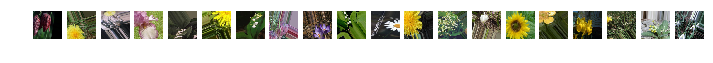

In [30]:
imgs, labels = next(train_batches)
plots(imgs)

In [33]:
num_classes = 17

model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'Same',activation ='relu', input_shape = (image_size,image_size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(BatchNormalization())
model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(.5))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation = "softmax"))

model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 128)      

In [35]:
model.fit_generator(train_batches, steps_per_epoch=400, 
                    validation_data=valid_batches, validation_steps=50, epochs=30, verbose=1)

Epoch 1/30
400/400 [==============================] - 391s 977ms/step - loss: 0.8906 - acc: 0.7028 - val_loss: 0.9733 - val_acc: 0.6721
Epoch 2/30
400/400 [==============================] - 390s 974ms/step - loss: 0.8321 - acc: 0.7212 - val_loss: 0.9250 - val_acc: 0.7004
Epoch 3/30
400/400 [==============================] - 392s 979ms/step - loss: 0.7620 - acc: 0.7469 - val_loss: 0.7977 - val_acc: 0.7166
Epoch 4/30
400/400 [==============================] - 391s 979ms/step - loss: 0.7199 - acc: 0.7595 - val_loss: 0.8544 - val_acc: 0.7213
Epoch 5/30
400/400 [==============================] - 391s 977ms/step - loss: 0.6759 - acc: 0.7754 - val_loss: 0.9574 - val_acc: 0.7328
Epoch 6/30
400/400 [==============================] - 395s 987ms/step - loss: 0.6357 - acc: 0.7867 - val_loss: 0.8106 - val_acc: 0.7045
Epoch 7/30
400/400 [==============================] - 398s 995ms/step - loss: 0.5852 - acc: 0.8040 - val_loss: 0.7664 - val_acc: 0.7652
Epoch 8/30
400/400 [============================